In [1]:
import pandas as pd
import numpy as np
from os import path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../../data/chen"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen_data.csv"))
chen_data

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0
...,...,...,...,...
2404,6s5a,EVKLLESGGGLVQPGGSLKLSCAASGFDFSRYWMNWVRQAPGKGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0
2405,6tyb,EVQLVQSGTEVKRPGESLTISCKTSGYSFSGTWISWVRQMPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISTYLAWYQQKPGKAPKL...,0
2406,6u1t,EVQLVESGGGLVKPGGSLKLSCAASGFTFSSYDMSWVRQTPEKRLE...,DIQMTQSPASQSASLGESVTITCLASQTIGTWLAWYQQKPGKSPQL...,0
2407,7fab,AVQLEQSGPGLVRPSQTLSLTCTVSGTSFDDYYWTWVRQPPGRGLE...,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAP...,0


In [4]:
chen_feat = pd.read_feather(path.join(DATA_DIR, "pybiomed/X_data.ftr"))
chen_feat.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,19750,19751,19752,19753,19754,19755,19756,19757,19758,19759
0,12e8,7.500,3.333,2.500,5.833,1.667,5.833,5.833,9.167,1.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15c8,9.244,0.000,3.361,5.882,1.681,4.202,6.723,8.403,2.521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1a0q,5.882,1.681,3.361,5.042,1.681,5.882,5.042,9.244,1.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1a14,6.667,2.500,4.167,5.000,1.667,2.500,7.500,11.667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1a2y,3.448,5.172,4.310,6.034,1.724,2.586,6.034,10.345,0.862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filter columns by number of missing values

Check for missing values:

In [6]:
chen_feat.isna().sum().sum()

0

In [8]:
nonzero = chen_feat.astype(bool).sum(axis=0)

In [19]:
len(nonzero)

19761

In [20]:
nonzero[:4]

Ab_ID    2409
0        2409
1        2400
2        2375
dtype: int64

Number of columns, which have fewer than *Threshold* non-zero values


In [21]:
for perc in np.arange(0,0.21,0.05):
    threshold = len(chen_feat) * perc
    num = nonzero[nonzero < threshold].count()
    print(f"Threshold: {round(perc*100)}%;\tCount: {num}")

Threshold: 0%;	Count: 0
Threshold: 5%;	Count: 15626
Threshold: 10%;	Count: 16208
Threshold: 15%;	Count: 16503
Threshold: 20%;	Count: 16692


Number of columns, which have at least *Threshold* non-zero values

In [22]:
for perc in np.arange(0,1.01,0.1):
    threshold = len(chen_feat) * perc
    num = nonzero[nonzero >= threshold].count()
    print(f"Threshold: {round(perc*100)}%;\tCount: {num}")

Threshold: 0%;	Count: 19761
Threshold: 10%;	Count: 3553
Threshold: 20%;	Count: 3069
Threshold: 30%;	Count: 2826
Threshold: 40%;	Count: 2670
Threshold: 50%;	Count: 2577
Threshold: 60%;	Count: 2499
Threshold: 70%;	Count: 2423
Threshold: 80%;	Count: 2363
Threshold: 90%;	Count: 2296
Threshold: 100%;	Count: 1359


Total number of columns:

In [10]:
len(chen_feat.columns)

19761

Filter out columns with less than 10% non-zero values:

In [24]:
# 10% of 2409 rows:
threshold = 0.1 * 2409
print(threshold)
filtered = chen_feat.loc[:, nonzero >= threshold]
filtered.head()

240.9


,Ab_ID,0,1,2,3,4,5,6,7,8,...,19690,19691,19697,19698,19702,19721,19725,19735,19739,19741
0,12e8,7.500,3.333,2.500,5.833,1.667,5.833,5.833,9.167,1.667,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,15c8,9.244,0.000,3.361,5.882,1.681,4.202,6.723,8.403,2.521,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1a0q,5.882,1.681,3.361,5.042,1.681,5.882,5.042,9.244,1.681,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1a14,6.667,2.500,4.167,5.000,1.667,2.500,7.500,11.667,0.000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1a2y,3.448,5.172,4.310,6.034,1.724,2.586,6.034,10.345,0.862,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [26]:
filtered.to_feather(path.join(DATA_DIR, "pybiomed_filtered/chen_data_10_perc_nonzero.ftr"))

# Reduce dimensions by PCA

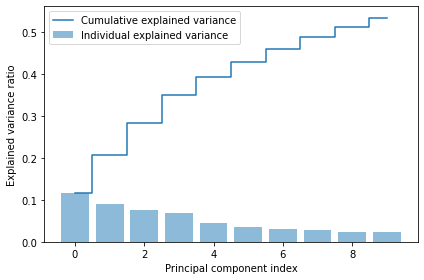

In [5]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(chen_feat.drop("Ab_ID", axis=1))

exp_var_pca = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
X_pca

array([[  6.2037782 , -11.58641193, -23.35567703, ...,  -0.39074406,
         -6.59316661,   2.00442177],
       [-32.84981906,  -0.55541051, -28.03101121, ...,  14.23575111,
        -10.21924544,  11.80582251],
       [ -1.93322566,   3.28861357, -30.91744879, ...,  14.14996917,
         -6.95643712, -11.92685339],
       ...,
       [ -3.81336383, -23.49084995,   9.57136022, ...,  -8.8361705 ,
         -4.08739309,  13.96164527],
       [-29.53276595,  29.55247746,  86.30631437, ...,  13.35046313,
         30.21082476,   9.71346065],
       [ 30.59407927, -10.71439013,  12.51837682, ..., -16.97071337,
          0.10189495,  17.48252828]])

In [9]:
pca = PCA()
X_pca = pca.fit_transform(chen_feat.drop("Ab_ID", axis=1))

exp_var_pca = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var_pca)

In [10]:
cum_sum

array([0.11740352, 0.20736553, 0.28263343, ..., 1.        , 1.        ,
       1.        ])

In [14]:
np.where(cum_sum >= 0.8)[0][0]

41

In [15]:
np.where(cum_sum >= 0.9)[0][0]

86

Cut-off at 90% explained variance

In [24]:
top_pc_vals = X_pca[:,:87]
top_pc = pd.DataFrame(top_pc_vals)
top_pc.insert(0, "Ab_ID", chen_feat["Ab_ID"])
top_pc.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,77,78,79,80,81,82,83,84,85,86
0,12e8,6.203778,-11.586412,-23.355678,25.305691,-22.606243,-9.194142,-1.772352,-0.390856,-6.586966,...,-0.019205,-3.990987,2.127482,-6.027751,2.545503,-1.227846,-0.396607,0.997742,0.841067,0.419024
1,15c8,-32.849819,-0.555410,-28.031012,21.804202,41.297370,13.561593,-17.313879,14.234665,-10.216319,...,-2.688147,-10.326772,3.697856,-5.032671,7.632122,-1.667724,-2.359591,4.982235,-0.792426,1.395539
2,1a0q,-1.933226,3.288613,-30.917447,-16.036783,-11.761531,-9.616267,-11.904319,14.150297,-6.956475,...,-6.554534,7.609523,2.582209,0.766134,0.939223,-3.294344,1.389478,-3.515518,-3.637572,0.209021
3,1a14,-17.473389,-27.456810,-11.750233,42.275745,-12.391351,1.259343,33.163444,18.158039,-0.091022,...,-0.470343,12.880582,-0.052809,1.833907,1.954641,1.596194,6.388072,5.018694,11.108835,1.345592
4,1a2y,2.406609,-45.422375,34.694564,-34.529390,42.759314,39.312483,23.661636,21.036321,-13.455115,...,4.352918,0.079762,0.791069,1.620226,-5.435064,1.751779,-0.167899,-0.346709,-5.155217,0.395462


In [26]:
top_pc.columns = top_pc.columns.astype(str)
top_pc.to_feather(path.join(DATA_DIR, "pybiomed_filtered/chen_data_90_perc_variance.ftr"))

# Remove outliers

## First on original features

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [28]:
clf = IsolationForest(random_state=42, n_estimators=300)
clf.fit(chen_feat.drop("Ab_ID", axis=1))
preds = clf.predict(chen_feat.drop("Ab_ID", axis=1))

In [29]:
preds

array([1, 1, 1, ..., 1, 1, 1])

All data points are classified as outliers...

## Now on filtered data:

In [35]:
filtered = pd.read_feather(path.join(DATA_DIR, "pybiomed_filtered/chen_data_10_perc_nonzero.ftr"))

In [36]:
clf = IsolationForest(random_state=42, n_estimators=300)
clf.fit(filtered.drop("Ab_ID", axis=1))
preds = clf.predict(filtered.drop("Ab_ID", axis=1))

In [37]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
preds.sum()

2389

In [42]:
np.where(preds == -1)

(array([ 665, 1236, 1631, 1745, 1752, 1774, 2216, 2217, 2218, 2220]),)

Here we have 10 outliers - this may be better.

In [38]:
top_pc = pd.read_feather(path.join(DATA_DIR, "pybiomed_filtered/chen_data_90_perc_variance.ftr"))

In [43]:
clf = IsolationForest(random_state=42, n_estimators=300)
clf.fit(top_pc.drop("Ab_ID", axis=1))
preds = clf.predict(top_pc.drop("Ab_ID", axis=1))

In [44]:
preds.sum()

2361

In [45]:
np.where(preds == -1)

(array([ 113,  273,  392,  974,  987, 1150, 1190, 1223, 1224, 1617, 1752,
        1882, 1883, 1884, 1915, 1952, 1985, 1986, 1987, 2097, 2160, 2340,
        2358, 2361]),)

In [48]:
set([ 665, 1236, 1631, 1745, 1752, 1774, 2216, 2217, 2218, 2220]).intersection(set([ 113,  273,  392,  974,  987, 1150, 1190, 1223, 1224, 1617, 1752,
        1882, 1883, 1884, 1915, 1952, 1985, 1986, 1987, 2097, 2160, 2340,
        2358, 2361]))

{1752}

There is only one outlier common to these methods of detection :(

In [51]:
chen_data["Antibody_ID"][2097]

'6b3d'

Crystal structure of bovine Fab A01

It's possible that most other Abs are human/murine (the ones I checked were all mouse or human)

### Get source organisms for all sequences.
This is a bit tricky, since many of the PDB structures contain more than one polymer molecule

In [ ]:
import requests

In [ ]:
def check_organism(pdb_id):
    orgs = []
    pdb_id = pdb_id.upper()
    query = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_id}"
    entry = requests.get(query).json()
    polymer_ids = entry["rcsb_entry_container_identifiers"]["polymer_entity_ids"]
    for polymer_id in polymer_ids:
        query = f"https://data.rcsb.org/rest/v1/core/polymer_entity/{pdb_id}/{polymer_id}"
        response = requests.get(query).json()
        if "rcsb_entity_source_organism" in response:
            organisms = response["rcsb_entity_source_organism"]
            for org in organisms:
                if "scientific_name" not in org:
                    continue
                scientific_name = org["scientific_name"]
                orgs.append(scientific_name)
        elif "entity_src_gen" in response:
            organisms = response["entity_src_gen"]
            for org in organisms:
                if "pdbx_gene_src_scientific_name" not in org:
                    continue
                scientific_name = org["pdbx_gene_src_scientific_name"]
                orgs.append(scientific_name)
    return set(orgs)

In [ ]:
def wrapper_check_organism(pdb_id):
    try:
        return check_organism(pdb_id)
    except KeyError as e:
        print(pdb_id)
        print(e)
        return 

In [ ]:
chen_data["scient_organisms"] = chen_data["Antibody_ID"].apply(wrapper_check_organism)
chen_data.head()

In [ ]:
chen_data.to_csv(path.join(DATA_DIR, "chen_data_with_scient_organism.csv"), index=False)

In [5]:
def split_orgs(orgs):
    orgs = orgs[1:-1]
    org_list = orgs.split(',')
    org_list = [org.replace("'", "").strip() for org in org_list]
    return org_list

In [6]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen_data_with_scient_organism.csv"))
chen_data["scient_organisms"] = chen_data["scient_organisms"].dropna().apply(split_orgs)
chen_data.head()

,Antibody_ID,heavy,light,Y,scient_organisms
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0,[Mus musculus]
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0,[Mus musculus]
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1,[Mus musculus]
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0,"[Influenza A virus, Mus musculus]"
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0,"[Gallus gallus, Mus musculus]"


In [7]:
chen_data["scient_organisms"].isna().sum()

16

In [23]:
chen_data["scient_organisms"].dropna().apply(len).value_counts()

1    1360
2     964
3      58
4       9
5       2
Name: scient_organisms, dtype: int64

In [66]:
def filter_by_organism(org_list):
   # if not np.isnan(org_list):
    #    return None
    if type(org_list) == list:
        org_list = [org.lower() for org in org_list]
        if "homo sapiens" in org_list or "mus musculus" in org_list:
            return True
        return False
    return None

In [67]:
correct_org = chen_data["scient_organisms"].apply(filter_by_organism)
correct_org.sum()

2300

In [68]:
correct_org.isna().sum()

16

-2301

93 PDB structures don't have human or mouse among the source organisms, organisms for 16 structures were not retrieved correctly.

### First set of outliers

In [9]:
outliers = [ 665, 1236, 1631, 1745, 1752, 1774, 2216, 2217, 2218, 2220]
for outlier in outliers:
    print(chen_data.iloc[outlier][["Antibody_ID", "scient_organisms"]])

Antibody_ID                   2xqb
scient_organisms    [Homo sapiens]
Name: 665, dtype: object
Antibody_ID                 4k3d
scient_organisms    [Bos taurus]
Name: 1236, dtype: object
Antibody_ID                 5e99
scient_organisms    [Bos taurus]
Name: 1631, dtype: object
Antibody_ID                 5ihu
scient_organisms    [Bos taurus]
Name: 1745, dtype: object
Antibody_ID                 5ilt
scient_organisms    [Bos taurus]
Name: 1752, dtype: object
Antibody_ID                   5jxa
scient_organisms    [Homo sapiens]
Name: 1774, dtype: object
Antibody_ID                 6e9g
scient_organisms    [Bos taurus]
Name: 2216, dtype: object
Antibody_ID                 6e9h
scient_organisms    [Bos taurus]
Name: 2217, dtype: object
Antibody_ID                 6e9i
scient_organisms    [Bos taurus]
Name: 2218, dtype: object
Antibody_ID                 6e9u
scient_organisms    [Bos taurus]
Name: 2220, dtype: object


### Second set of outliers

In [10]:
outliers = [ 113,  273,  392,  974,  987, 1150, 1190, 1223, 1224, 1617, 1752,
        1882, 1883, 1884, 1915, 1952, 1985, 1986, 1987, 2097, 2160, 2340,
        2358, 2361]
for outlier in outliers:
    print(chen_data.iloc[outlier][["Antibody_ID", "scient_organisms"]])

Antibody_ID                   1fl3
scient_organisms    [Mus musculus]
Name: 113, dtype: object
Antibody_ID                   1nfd
scient_organisms    [Mus musculus]
Name: 273, dtype: object
Antibody_ID                   1ub6
scient_organisms    [Mus musculus]
Name: 392, dtype: object
Antibody_ID                   3rpi
scient_organisms    [Homo sapiens]
Name: 974, dtype: object
Antibody_ID                                                   3se9
scient_organisms    [Human immunodeficiency virus 1, Homo sapiens]
Name: 987, dtype: object
Antibody_ID                   4gw4
scient_organisms    [Homo sapiens]
Name: 1150, dtype: object
Antibody_ID                                                 4i3s
scient_organisms    [Homo sapiens, Human Immunodeficiency Virus]
Name: 1190, dtype: object
Antibody_ID                                                   4jpv
scient_organisms    [Homo sapiens, HUMAN IMMUNODEFICIENCY VIRUS 1]
Name: 1223, dtype: object
Antibody_ID                                      